In [1]:
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)

In [2]:
print("The version of osmnx is :", ox.__version__)
print("The version of numpy is :", np.__version__)
print("The version of networkx is :", nx.__version__)
print("The version of pandas is :", pd.__version__)

The version of osmnx is : 0.11.4
The version of numpy is : 1.18.1
The version of networkx is : 2.4
The version of pandas is : 1.0.1


In [3]:
# the biking network for Montpellier, create network around point
G_bike = ox.graph_from_place(
    'Montpellier, Hérault, France', network_type='bike')
# fig, ax = ox.plot_graph(G_bike) to see the map of Montpellier

# create network around point, define origin/destination nodes
origin_point = ox.geo_utils.geocode(
    'Place Eugène Bataillon, Montpellier, France')
destination_point = ox.geo_utils.geocode('Maison du Lez, Montpellier, France')
# or define a lat-long point
# origin_point = (43.610395, 3.896729) # la maison du lez
# destination_point = (43.632315, 3.860388) # place eugène bataillon

# define origin/desination points then get the nodes nearest to each
origin_node = ox.get_nearest_node(G_bike, origin_point)
destination_node = ox.get_nearest_node(G_bike, destination_point)

# find the shortest path between origin and destination nodes
route = nx.shortest_path(G_bike, origin_node, destination_node)

In [4]:
# some tests
G_walk = ox.graph_from_place(
    'Montpellier, Hérault, France', network_type='walk')
routee = nx.shortest_path(G_walk, origin_node, destination_node)

#ox.plot_graph_route(G_bike, route, origin_point=origin_point, destination_point=destination_point)
#ox.core.add_path( G_walk ,routee, False) 
#ox.plot_graph_routes(G_bike, [route,routee])

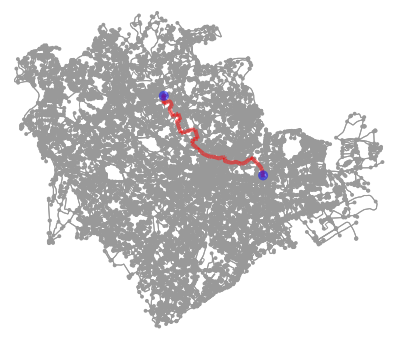

(<Figure size 699.94x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26ee5866908>)

In [5]:
# plot the route showing origin/destination lat-long points in blue
ox.plot_graph_route(G_bike, route, origin_point=origin_point, destination_point=destination_point)

In [6]:
ox.plot_route_folium(G_bike, route, route_width=2, route_color='hotpink')

In [7]:
def type_transport(transport, departure, arrival):
    #if departure != departure, 'Montpellier, France'
        #print(the format is not available)
    G = ox.graph_from_place(
        'Montpellier, Hérault, France', network_type = transport)
    origin_point = ox.geo_utils.geocode(departure)
    destination_point = ox.geo_utils.geocode(arrival)
    origin_node = ox.get_nearest_node(G, origin_point)
    destination_node = ox.get_nearest_node(G, destination_point)
    route = nx.shortest_path(G, origin_node, destination_node)
    return(ox.plot_route_folium(G, route, route_width=2, route_color='hotpink'))

In [8]:
type_transport('walk', 'Maison du Lez, Montpellier, France', 'Place Eugène Bataillon, Montpellier, France')